<a href="https://colab.research.google.com/github/RahulDhinakaran/Data_Science_Projects/blob/main/Decision_Tree_for_Company_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.**

In [1]:
from google.colab import files
upload=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
import pandas as pd
import numpy as np
df.shape
df.info()
pd.set_option('display.max_columns', None)
df
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
list(df)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [5]:

median_sales=df["Sales"].median()
df["Sales"] = ["High" if value > median_sales
              else "Low" for value in df["Sales"]]
df["Sales"]


0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object

In [6]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.mode()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Low,121.0,69.0,0.0,125,120.0,Medium,62.0,12.0,Yes,Yes
1,NaN,NaN,NaN,NaN,148,128.0,NaN,NaN,17.0,NaN,NaN
2,NaN,NaN,NaN,NaN,170,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,220,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,237,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,276,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,497,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Advertising'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>, <Axes: >, <Axes: >]],
      dtype=object)

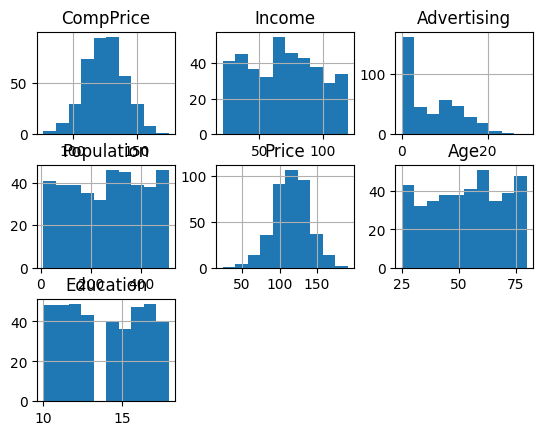

In [8]:
df.hist()

In [9]:
df.skew()

<ipython-input-9-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
column_to_encoder=["ShelveLoc","Urban","US","Sales"]
for column in column_to_encoder:
  df[column]=LE.fit_transform(df[column])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [16]:
X=df.iloc[:,1:]
Y=df["Sales"]


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [18]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion='poisson',max_depth=6)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

In [19]:
DT.tree_.max_depth
DT.tree_.node_count

43

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions
predictions = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 1.0


In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (120, 4)
y_train shape: (120,)


In [22]:
from sklearn.model_selection import train_test_split

# Correct way of splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
# metrics
from sklearn.metrics import mean_squared_error
error1= mean_squared_error(Y_train,Y_pred_train)
print("Training Error:", np.sqrt(error1).round(3))
error2= mean_squared_error(Y_test,Y_pred_test)
print("Test Error:", np.sqrt(error2).round(3))

print("Number of Nodes",DT.tree_.node_count)
print("Level of Depth",DT.tree_.max_depth)

Training Error: 0.283
Test Error: 0.461
Number of Nodes 43
Level of Depth 6


In [38]:
#hyper Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use GridSearchCV to perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy:  0.9666666666666668


In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train,Y_pred_train)
print("Mean squared error: ", mse.round(3))

Mean squared error:  0.08


In [36]:
import numpy as np
print("Root Mean squared error: ", np.sqrt(mse).round(3))

Root Mean squared error:  0.283


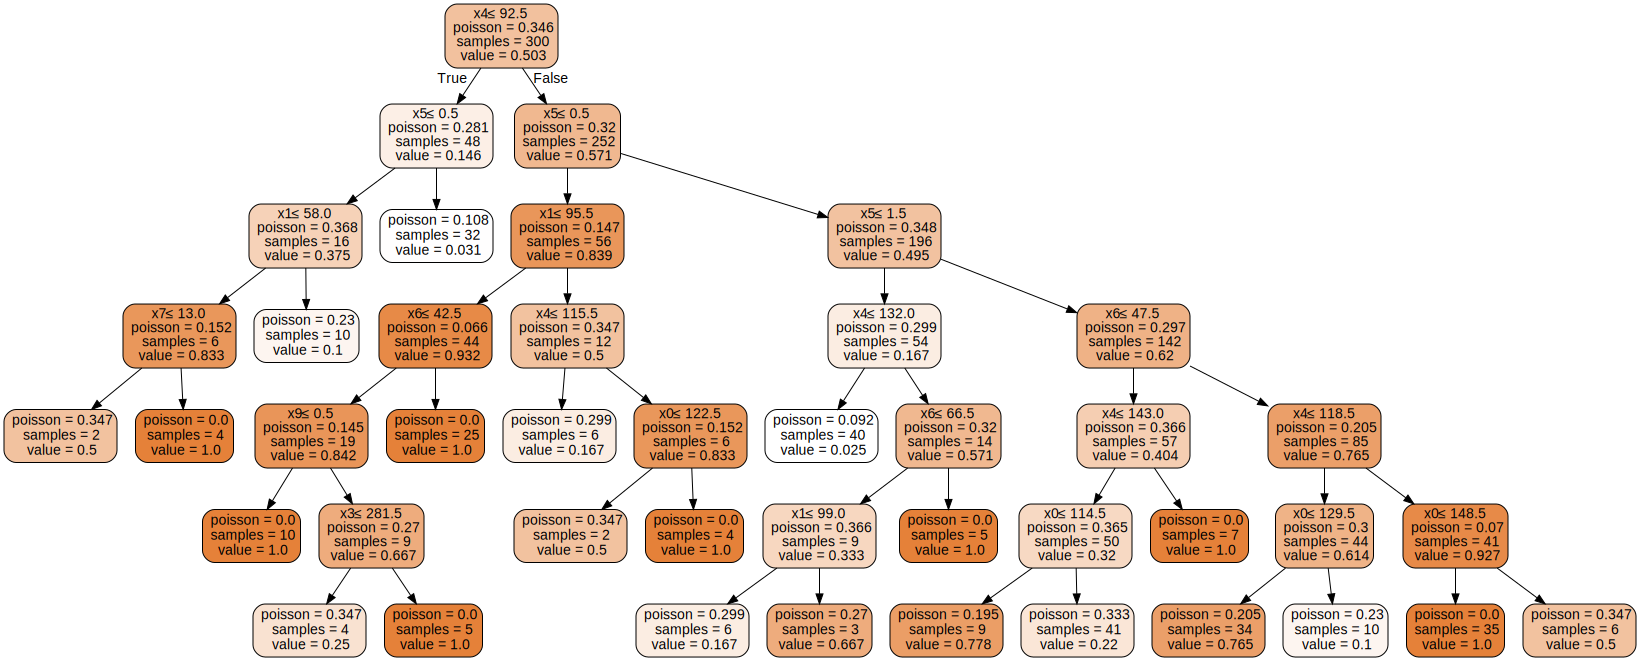

In [37]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DT,filled=True, rounded=True,
                    special_characters=True)
graph = graphviz.Source(dot_data)
graph